In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")
# Show me first 5 rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [21]:
# Show basic info like datatype of data / null ?
print("\nData Types & Nulls:")
print(df.info())


Data Types & Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [22]:
# find missing values of the data 
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
#it show summary 
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [24]:
# encoding missing Age with median 
df["Age"] = df["Age"].fillna(df["Age"].median())

In [25]:
# entering missing Embarked with most repeated value
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [26]:
df = df.drop("Cabin", axis=1)

In [27]:
print(df.isnull().sum())#re checking the missing values 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [28]:
# replacing Sex(char) to numbers: male -> 0, female -> 1
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [29]:
# One-hot encode Embarked
df = pd.get_dummies(df, columns=["Embarked"], prefix="Embarked")

In [30]:
from sklearn.preprocessing import StandardScaler
# Create scaler object
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])
print(df[["Age", "Fare"]].head()) 

        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


In [31]:
# replaceing boolean to biy (0/1) to make more ML
bool_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
df[bool_cols] = df[bool_cols].astype(int)

In [32]:
print(df.head())
print(df.dtypes)  # See data types

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445           0           0           1  
1      0          PC 17599  0.786845           1           0           0  
2      0  STON/O2. 3101282 -0.488854           0           0           1  
3      0      

Boxplot before removing outliers in Fare column:


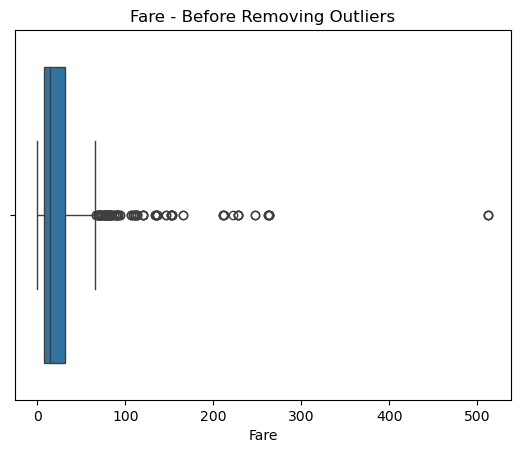

In [36]:
print("Boxplot before removing outliers in Fare column:")
sns.boxplot(x=df['Fare'])
plt.title("Fare - Before Removing Outliers")
plt.show()

In [37]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [38]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [39]:
df = df[(df['Fare'] >= lower_limit) & (df['Fare'] <= upper_limit)]


Boxplot after removing outliers in Fare column:


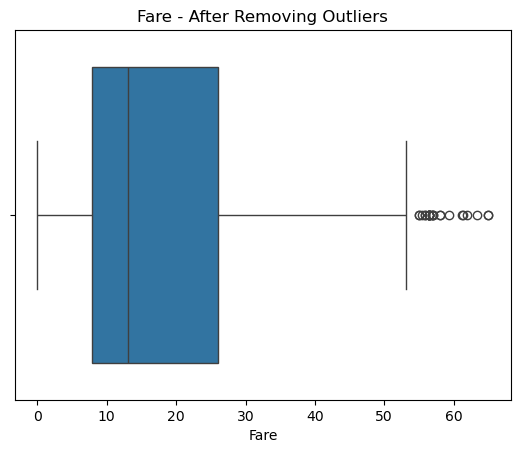

In [40]:
print("Boxplot after removing outliers in Fare column:")
sns.boxplot(x=df['Fare'])
plt.title("Fare - After Removing Outliers")
plt.show()

In [42]:
df.to_csv("cleaned_titanic.csv", index=False)

print("Cleaned dataset saved as 'cleaned_titanic.csv'")

Cleaned dataset saved as 'cleaned_titanic.csv'
